In [1]:
using Pkg
pkg"activate ."

  Activating project at `~/Dropbox/PostDocMTL/Notebooks/PresentationJuMP`


In [2]:
pkg"status"

      Status `~/Dropbox/PostDocMTL/Notebooks/PresentationJuMP/Project.toml`
  [54578032] ADNLPModels v0.3.1
  [14f7f29c] AMD v0.4.0
  [77dd3d4c] AmplNLReader v0.11.2
  [ecbce9bc] BenchmarkProfiles v0.3.4 `https://github.com/JuliaSmoothOptimizers/BenchmarkProfiles.jl#main`
  [1b53aba6] CUTEst v0.12.2
  [5a1c9e79] CaNNOLeS v0.5.3
  [bee2e536] DCISolver v0.2.5
  [a93c6f00] DataFrames v1.3.2
  [56d4f2e9] Gridap v0.15.5
  [7073ff75] IJulia v1.23.2
  [10dff2fc] JSOSolvers v0.7.5
  [4076af6c] JuMP v0.22.2
  [ba0b0d4f] Krylov v0.7.11
  [40e66cde] LDLFactorizations v0.8.1
  [39f5bc3e] LLSModels v0.3.2
  [5c8ed15e] LinearOperators v2.2.3
  [30dfa513] ManualNLPModels v0.1.1
  [a4795742] NLPModels v0.18.1
  [f4238b75] NLPModelsIpopt v0.9.0 `https://github.com/JuliaSmoothOptimizers/NLPModelsIpopt.jl#main`
  [792afdf1] NLPModelsJuMP v0.9.1
  [e01155f1] NLPModelsModifiers v0.5.1
  [7998695d] NLPModelsTest v0.6.1
  [7cde8186] NLSProblems v0.4.4
  [5049e819] OptimizationProblems v0.4.1
  [80da258d] PDE

# A Roadmap for JuliaSmoothOptimizers and its NLPModels API

<img src="assets/figs/logo.png" width="100">

**Tangi Migot** (@tmigot) GERAD/École Polytechnique de Montréal, Montreal/QC, Canada

**Alexis Montoison** (@amontoison) GERAD/École Polytechnique de Montréal, Montreal/QC, Canada

**Dominique Orban** (@dpo) GERAD/École Polytechnique de Montréal, Montreal/QC, Canada

**Abel Soares Siqueira** (@abelsiqueira) Netherlands eScience Center, Amsterdam, Netherlands

**and all JSO's contributors!!**

In this talk, we will present the main features of the organization [JuliaSmoothOptimizers](https://github.com/JuliaSmoothOptimizers) and, in particular, its modeling API called `NLPModels`.

The presentation will be organized as follows.


1. Introduction of the organization JuliaSmoothOptimizers;


2. Motivation for a unified API for nonlinear optimization: large-scale solvers;


3. NLPModels;


4. NLPModels using GPU.


<img src="assets/figs/JSO-graph-2021.jpg" width="1000">

# 1. Introduction of the organization JuliaSmoothOptimizers

[JuliaSmoothOptimizers](https://github.com/JuliaSmoothOptimizers) is a Github organization mainly organized around Prof. Dominique Orban research team in GERAD/École Polytechnique de Montréal.

We develop linear algebra and optimization tools for developers/researchers/academics. We focus on nonlinear nonconvex continuous optimization models as follows:

$$
\min_{x \in R^n} \quad f(x) \quad \mbox{ s.t. } \quad lcon \leq c(x) \leq ucon, \quad lvar \leq x \leq uvar.
$$
where $f:R^n \rightarrow R$ and $c:R^n \rightarrow R^m$. Very often, we will use derivatives of $f$ and $c$.

JSO currently provides 37 registered packages including solvers for optimization and linear algebra, benchmarking tools, modeling tools and test problems. 

<img src="assets/figs/packages.png" width="700">

Our main target is academic work, see [references](https://jso-docs.github.io/references/), but we are starting to improve documentation to attract more users and contributors.

- The new website [https://jso-docs.github.io/](https://jso-docs.github.io/) includes tutorials;


- Each package is starting to have docstring and tutorials, [For instance, DCISolver.jl with binder links.](https://juliasmoothoptimizers.github.io/DCISolver.jl/dev/example/);


- The organization is also used for teaching.

# 2. Motivation for a unified API for nonlinear optimization: large-scale solvers

One of the main motivation in JSO is to develop new solvers for optimization. A JSO-compliant solver comply with:


- A unified output `GenericExecutionStats` defined in [SolverCore.jl](https://github.com/JuliaSmoothOptimizers/SolverCore.jl/blob/0091f437a26a27ac8aa53d5e37647223722f7f7c/src/stats.jl#L37);


- A logging system;


- Most importantly relies on `AbstractNLPModel` the abstract interface implementing the NLPModel API.


This last feature is the most important so that solvers are independant of the origin of the models.

In [3]:
using CUTEst
cnlp = CUTEstModel("ROSENBR") # finalized before

using JSOSolvers, Logging
stats = with_logger(ConsoleLogger()) do
    lbfgs(cnlp, verbose = 1)
end

┌ Info: using problem repository
│   ENV["MASTSIF"] = /home/tmigot/.julia/artifacts/a7ea0d0aaf29a39ca0fe75588fc077cdd5b5ed54/optrove-sif-99c5b38e7d03
└ @ CUTEst /home/tmigot/.julia/packages/CUTEst/CORgJ/src/CUTEst.jl:76
[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd      bk  
[ Info:      0   2.4e+01   2.3e+02  -5.4e+04       7
[ Info:      1   2.2e+01   1.6e+02  -2.6e+01       0
[ Info:      2   4.9e+00   4.1e+01  -2.1e+00       0
[ Info:      3   4.2e+00   1.1e+01  -1.3e-01       0
[ Info:      4   4.1e+00   1.9e+00  -3.2e-03       0
[ Info:      5   4.1e+00   1.8e+00  -4.2e-01       0
[ Info:      6   3.8e+00   1.7e+01  -1.7e-01       0
[ Info:      7   3.7e+00   1.9e+01  -8.0e-01       0
[ Info:      8   3.2e+00   2.2e+01  -7.3e-01       0
[ Info:      9   2.7e+00   7.9e+00  -7.7e-01       0
[ Info:     10   2.6e+00   2.2e+01  -1.2e+00       0
[ Info:     11   2.2e+00   3.0e+00  -2.5e-01       0
[ Info:     12   1.9e+00   4.3e+00  -1.7e+00       2
[ Info:     13   1.7e+00   8.4e+00  

"Execution stats: first-order stationary"

In [4]:
print(stats)

Generic Execution stats
  status: first-order stationary
  objective value: 1.445605332105295e-17
  primal feasibility: 0.0
  dual feasibility: 8.411308266965997e-8
  solution: [1.0000000033782899  1.0000000065821317]
  iterations: 39
  elapsed time: 2.7558059692382812


In [5]:
using NLPModelsIpopt
stats = ipopt(cnlp, print_level = 0)
print(stats)

finalize(cnlp) # necessary when using CUTEstModel


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Generic Execution stats
  status: first-order stationary
  objective value: 3.743975643139474e-21
  primal feasibility: 0.0
  dual feasibility: 3.732500974666708e-10
  solution: [0.9999999999400667  0.9999999998789006]
  multipliers_L: [0.0  0.0]
  multipliers_U: [0.0  0.0]
  iterations: 21
  elapsed time: 0.0
  solver specific:
    real_time: 0.8652670383453369
    internal_msg: :Solve_Succeeded


Finally, JSO-compliant can easily be benchmarked. We use here [`SolverBenchmark.jl`](https://github.com/JuliaSmoothOptimizers/SolverBenchmark.jl) to compare:
- [`NLPModelsIpopt.jl`](https://github.com/JuliaSmoothOptimizers/NLPModelsIpopt.jl): a thin NLPModel wrapper of [Ipopt.jl](https://github.com/jump-dev/Ipopt.jl);
- [`DCISolver.jl`](https://github.com/JuliaSmoothOptimizers/DCISolver.jl): a JSO pure Julia implementation of the dynamic control of infeasibility method.

We use tests problems from [`CUTEst.jl`](https://github.com/JuliaSmoothOptimizers/CUTEst.jl) the famous collection of test problems.

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /home/tmigot/.julia/packages/BenchmarkProfiles/nN6DL/src/performance_profiles.jl:14


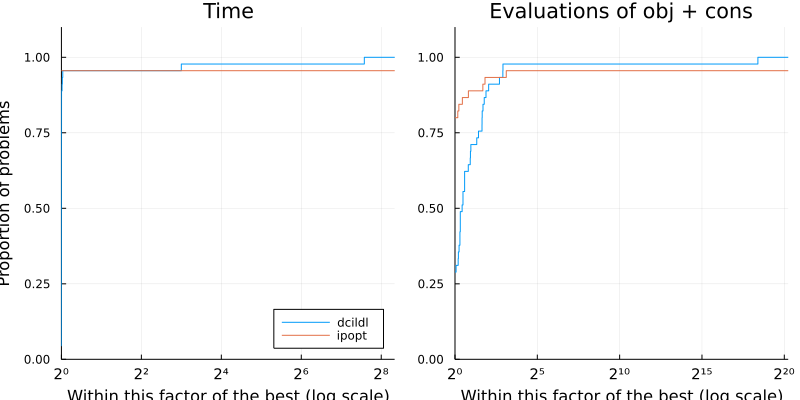

In [6]:
using CUTEst, NLPModelsIpopt, DCISolver, SolverBenchmark

nmax = 300
_pnames = CUTEst.select(
  max_var = nmax,
  min_con = 1,
  max_con = nmax,
  only_free_var = true,
  only_equ_con = true,
  objtype = 3:6,
)

#Remove all the problems ending by NE as Ipopt cannot handle them.
pnamesNE = _pnames[findall(x -> occursin(r"NE\b", x), _pnames)]
problems = pnames = setdiff(_pnames, pnamesNE)
cutest_problems = (CUTEstModel(p) for p in problems)

max_time = 1200.0 #20 minutes
tol = 1e-5

solvers = Dict(
  :ipopt => nlp -> ipopt(
      nlp,
      print_level = 0,
      dual_inf_tol = Inf,
      constr_viol_tol = Inf,
      compl_inf_tol = Inf,
      acceptable_iter = 0,
      max_cpu_time = max_time,
      tol = tol,
  ),
  :dcildl => nlp -> dci(
      nlp,
      linear_solver = :ldlfact,
      max_time = max_time,
      max_iter = typemax(Int64),
      max_eval = typemax(Int64),
      atol = tol,
      ctol = tol,
      rtol = tol,
  ),
)
stats = with_logger(NullLogger()) do
    bmark_solvers(solvers, cutest_problems)
end

solved(df) = (df.status .== :first_order)
costs = [
  df -> .!solved(df) * Inf + df.elapsed_time,
  df -> .!solved(df) * Inf + df.neval_obj + df.neval_cons,
]
costnames = ["Time", "Evaluations of obj + cons"]
p = profile_solvers(stats, costs, costnames, width=400, height=400)

All in all, we have several solvers including pure Julia implementations designed for different types of optimization models.
<img src="assets/figs/solvers_roadmap.png" width="700">

### What's inside?


- LinearAlgebra problems handled by [LDLFactorizations.jl](https://github.com/JuliaSmoothOptimizers/LDLFactorizations.jl) or [HSL.jl](https://github.com/JuliaSmoothOptimizers/HSL.jl) for direct methods and  [Krylov.jl](https://github.com/JuliaSmoothOptimizers/Krylov.jl) for iterative methods. The latter is used by researchers in linear algebra and contains 32 methods tailored for specific problems (square or rectangular full-rank systems, linear least-squares problems, linear least-norm problems, adjoint systems, saddle-point and symmetric quasi-definite systems and generalized saddle-point and unsymmetric partitioned systems).

  Ongoing is the support of complex systems with Krylov.jl.
  

- We need a convenient access to the derivatives and in particular:
    - sparse hessian and jacobian matrices (we use COO-matrix format);
    - operator-ish way to compute hessian-vector products and jacobian-vector products.
    
For matrices that behave like operators we rely on [LinearOperators.jl](https://github.com/JuliaSmoothOptimizers/LinearOperators.jl). Note that `LinearOperators` and `Krylov` are compatible with GPUs.

# 3. NLPModels

In [7]:
using NLPModels

- Define nonlinear optimization models and a unified API to access them;


- Some models provide sparse derivatives;


- Some models provide matrix-free products (i.e. no explicit matrix used);


- Creating a new model is easy.


A very important feature is to rely on a predefined API independently of the origin of the problem.

In [8]:
# ADNLPModel uses automatic differentiation (by default: ForwardDiff)
using ADNLPModels
adnlp = ADNLPModel(x -> (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2, [-1.2; 1.0])

# CUTEst is a famous library. ROSENBR is the same problem
using CUTEst
cnlp = CUTEstModel("ROSENBR")

using JuMP, NLPModelsJuMP
m = Model()
@variable(m, x[1:2])
set_start_value.(x, [-1.2; 1.0])
@NLobjective(m, Min, (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2)

mpnlp = MathOptNLPModel(m)

for (name, nlp) in [("Autodiff", adnlp),
                    ("CUTEst", cnlp),
                    ("JuMP", mpnlp)]
    x = nlp.meta.x0
    println("Model $name")
    println("fx = ", obj(nlp, x))
    println("gx = ", grad(nlp, x))
    println("Hx = ", hess(nlp, x))
end
finalize(cnlp)

Model Autodiff
fx = 24.199999999999996
gx = [-215.59999999999997, -87.99999999999999]
Hx = [1330.0 480.0; 480.0 200.0]
Model CUTEst
fx = 24.199999999999996
gx = [-215.59999999999997, -87.99999999999999]
Hx = [1330.0 480.0; 480.0 200.0]
Model JuMP
fx = 24.199999999999996
gx = [-215.59999999999997, -87.99999999999999]
Hx = [1330.0 480.0; 480.0 200.0]


Each model instantiate an `AbstractNLPModel` providing three things [see NLPModels.jl documentation](https://juliasmoothoptimizers.github.io/NLPModels.jl/dev/):


- An `NLPModelMeta` containing the main metadata of the problem (dimension of the problem, number of nonzeros in the hessian and in the jacobian, number of constraints, indices of linear constraints, ...);


- A `Counters` which keeps track of the number of evaluation of each function and their derivatives;


- API functions in-place and out-of-place: `obj`, `grad`, `objgrad`, `hess`, `hprod`, `hess_op`, `hess_structure`, `hess_coord`, `cons`, `jac`, `jac_coord`, `jac_structure`, `jac_op`, `jprod`, `jtprod`.


The computation of the hessian also includes the Lagrangian hessian:
$$
L(x,\lambda;\sigma) = \sigma f(x) + c(x)^T\lambda,
$$

In [9]:
using ADNLPModels
nlp = ADNLPModel(
      x -> (x[1] - 1)^2, # objective function
      [-1.2; 1.0], # initial guess
      x -> [10 * (x[2] - x[1]^2)], # constraint function
      zeros(1), # left-hand side
      zeros(1), # right-hand side
      name = "HS6", # name
    )
print(nlp.meta)

  Problem name: HS6
   All variables: ████████████████████ 2      All constraints: ████████████████████ 1     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ████████████████████ 1     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   3               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ████████████████████ 1     
                                                         nnzj: (  0.00% sparsity)   2     



In [10]:
x = nlp.meta.x0
l, u = nlp.meta.lvar, nlp.meta.uvar # bounds on x
cl, cu = nlp.meta.lcon, nlp.meta.ucon # bounds on c(x)
nvar, ncon = nlp.meta.nvar, nlp.meta.ncon
nnzh, nnzj = nlp.meta.nnzh, nlp.meta.nnzj # number of nonzeros in the hessian and jacobian
println("nvar=$nvar, ncon=$ncon, nnzh=$nnzh, nnzj=$nnzj")

nvar=2, ncon=1, nnzh=3, nnzj=2


In [11]:
σ = 0.5
x = rand(nvar)
y = rand(ncon)
v = rand(nvar)
g = similar(x)

grad!(nlp, x, g) # all the functions have in-place versions so solvers don't allocate

2-element Vector{Float64}:
 -1.6196065506265505
 -0.0

By default, we handle hessian and jacobian matrices in COO-format:

In [12]:
hess_structure(nlp), hess_coord(nlp, x, obj_weight = σ)

(([1, 2, 2], [1, 1, 2]), [1.0, 0.0, 0.0])

Note that for the Hessian matrix, we only store the lower triangular:

In [13]:
Hx = hess(nlp, x) # it is a `Symmetric` object as only the lower triangular is stored.

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 2.0  0.0
 0.0  0.0

The NLPModel API also provides access to an operator-like Hessian.

In [14]:
Hop = hess_op(nlp, x, y, obj_weight = σ)

Linear operator
  nrow: 2
  ncol: 2
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   0
  ntprod:  0
  nctprod: 0



Then, there are two ways to compute matrix-vector products:

In [15]:
println("Hop * v = $(Hop * v)")
println("hprod(nlp, x, y, v, obj_weight = σ) = $(hprod(nlp, x, y, v, obj_weight = σ))")

Hop * v = [-2.57423223781834, 0.0]
hprod(nlp, x, y, v, obj_weight = σ) = [-2.57423223781834, 0.0]


After some computations are done, we can check the counters:

In [16]:
println("# of grad: neval_grad(nlp) = $(neval_grad(nlp))")
println("# of hess: neval_hess(nlp) = $(neval_hess(nlp))")
println("# of hprod: neval_hprod(nlp) = $(neval_hprod(nlp))")

# of grad: neval_grad(nlp) = 1
# of hess: neval_hess(nlp) = 2
# of hprod: neval_hprod(nlp) = 2


## 3.1 Multi-precision models

A key feature is the possibility to use different types.

In [17]:
T = Float32 # the chosen type
nlp = ADNLPModel(
      x -> (x[1] - 1)^2, # objective function
      T[-1.2; 1.0], # initial guess
      x -> [10 * (x[2] - x[1]^2)], # constraint function
      zeros(T, 1), # left-hand side
      zeros(T, 1), # right-hand side
      name = "HS6", # name
    )
fx = obj(nlp, nlp.meta.x0)
print("obj(nlp, nlp.meta.x0) = $fx ")
println("and it is type-stable, typeof(obj(nlp, nlp.meta.x0)) = $(typeof(fx)).")

obj(nlp, nlp.meta.x0) = 4.84 and it is type-stable, typeof(obj(nlp, nlp.meta.x0)) = Float32.


This allows the pure Julia solvers to run computations in any precision.

In [18]:
stats = with_logger(NullLogger()) do
    dci(nlp)
end
println(stats.solution)

Float32[0.99999994, 0.9999998]


## 3.2 Nonlinear least squares: NLSModels

$$
\min_{x \in R^n} \quad \|F(x)\|^2 \quad \mbox{ s.t. } \quad lcon \leq c(x) \leq ucon, \quad lvar \leq x \leq uvar.
$$
These models are very frequent and considered separately as they also have functions to access the residual `F` and its derivatives.

In [19]:
using ADNLPModels
nls = ADNLSModel(
    x -> [x[1] - 1; 2x[2] - 2], # residual function
    zeros(2), # initial guess
    2, # size of the residual vector
    name = "(x₁ - 1)² + 4(x₂ - 1)²", # name
)

residual(nls, nls.meta.x0)

2-element Vector{Float64}:
 -1.0
 -2.0

Given our focus on linear algebra, we also have a focus on linear least squares and the package [`LLSModels.jl`](https://github.com/JuliaSmoothOptimizers/LLSModels.jl) offer a very convenient structure for such problems.

In [20]:
using LLSModels
A = jac_op_residual(nls, nls.meta.x0)
b = residual(nls, nls.meta.x0)
lls = LLSModel(A, b)

LLSModel - Linear least-squares model
  Problem name: generic-LLSModel
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   4     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (100.00% sparsity)   0               linear: ⋅⋅⋅⋅

We can then use [`Krylov.jl`](https://github.com/JuliaSmoothOptimizers/Krylov.jl) collection of methods to solve a "linearized" version of the nonlinear least squares.

In [21]:
using Krylov
(x, stats) = cgls(lls.A, lls.b) # `cgls` is a variant of the conjugate gradient adapted to linear least squares.

([-1.0, -0.9999999999999999], Simple stats
 niter: 2
 solved: true
 inconsistent: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 status: solution good enough given atol and rtol
)

## 3.3 PDENLPModels

[`PDENLPModels.jl`](https://github.com/JuliaSmoothOptimizers/PDENLPModels.jl) uses Gridap.jl finite-element toolbox to model and discretize PDE-constrained optimization problems.

In [22]:
using PDENLPModels

#### Problem Statement

Let Ω = (-1,1)², we solve the following distributed Poisson control problem with Dirichlet boundary:
$$
   \left\lbrace
   \begin{aligned}
      \min_{y \in H^1_0, u \in H^1} \quad &  \frac{1}{2} \int_\Omega |y(x) - y_d(x)|^2dx + \frac{\alpha}{2} \int_\Omega |u|^2dx \\
      \text{s.t.} & -\Delta y = h + u, \quad x \in \Omega, \\
                  & y = 0, \quad x \in \partial \Omega,
   \end{aligned}
   \right.
$$
where yd(x) = -x₁² and α = 1e-2.
The force term is h(x₁, x₂) = - sin(ω x₁)sin(ω x₂) with  ω = π - 1/8.

We refer to [Gridap.jl](https://github.com/gridap/Gridap.jl) for more details on modeling PDEs and [PDENLPModels.jl](https://github.com/JuliaSmoothOptimizers/PDENLPModels.jl) for PDE-constrained optimization problems.


In [23]:
using Gridap

# Definition of the domain and discretization
n = 10
domain = (-1, 1, -1, 1)
partition = (n, n)
model = CartesianDiscreteModel(domain, partition)

# Definition of the FE-spaces
reffe = ReferenceFE(lagrangian, Float64, 2)
Xpde = TestFESpace(model, reffe; conformity = :H1, dirichlet_tags = "boundary")
y0(x) = 0.0
Ypde = TrialFESpace(Xpde, y0)

reffe_con = ReferenceFE(lagrangian, Float64, 1)
Xcon = TestFESpace(model, reffe_con; conformity = :H1)
Ycon = TrialFESpace(Xcon)
Y = MultiFieldFESpace([Ypde, Ycon])

# Integration machinery
trian = Triangulation(model)
degree = 1
dΩ = Measure(trian, degree)

# Objective function
yd(x) = -x[1]^2
α = 1e-2
function f(y, u)
  ∫(0.5 * (yd - y) * (yd - y) + 0.5 * α * u * u) * dΩ
end

# Definition of the constraint operator
ω = π - 1 / 8
h(x) = -sin(ω * x[1]) * sin(ω * x[2])
function res(y, u, v) # weak formulation of the PDE
  ∫(∇(v) ⊙ ∇(y) - v * u - v * h) * dΩ
end
op = FEOperator(res, Y, Xpde)

# Definition of the initial guess
npde = Gridap.FESpaces.num_free_dofs(Ypde)
ncon = Gridap.FESpaces.num_free_dofs(Ycon)
x0 = zeros(npde + ncon);

Overall, we built a GridapPDENLPModel, which implements the [NLPModels.jl](https://github.com/JuliaSmoothOptimizers/NLPModels.jl) API.

In [24]:
nlp = GridapPDENLPModel(x0, f, trian, Ypde, Ycon, Xpde, Xcon, op, name = "Control elastic membrane")

(nlp.meta.nvar, nlp.meta.ncon, nlp.meta.nnzh, nlp.meta.nnzj)

(482, 361, 15456, 9536)

This problem can be solved like any other NLPModel.

In [25]:
using DCISolver, Logging

stats_dci = with_logger(NullLogger()) do
  dci(nlp, rand(nlp.meta.nvar), atol = 1e-5, rtol = 0.0)
end

# The problem was successfully solved, and we can extract the function evaluations from the stats.
print(stats_dci.counters)

# and also check objective value, feasibility and dual feasibility.
(stats_dci.objective, stats_dci.primal_feas, stats_dci.dual_feas)

  Counters:
             obj: █⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 4                 grad: █⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 4                 cons: █⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 9     
            jcon: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jgrad: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                  jac: █⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           jprod: ████████████████████ 550             jtprod: ████████████████████ 550               hess: █⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
        residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0         jac_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0       jprod_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
 jtprod_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        hess_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0       jhess_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
  hprod_residual: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     


(0.005445554531469045, 2.429801175534973e-10, 1.6010943769255001e-6)

## 3.4 More NLPModels

Similarly to `NLSModels`, we have different packages for the different implementations of `NLPModels`.

<img src="assets/figs/nlp_ecosystem.png" width="700">

### Make sure your new model is valid

During the development of your model, you might find the need for more robust tests.
The package [`NLPModelsTest.jl`](https://github.com/JuliaSmoothOptimizers/NLPModelsTest.jl) provides problems and functions to that end.
The main usage of this package are the consistency checks, which runs a comparison of two or models on all API functions.
Check the [docs](https://JuliaSmoothOptimizers.github.io/NLPModelsTest.jl/dev) for the complete usage.

### Modifying models
Beyond having models to create problems, we have models to modify them;


- `SlackModel` transforms inequalities in equalities with bounds:
$$ \min_x \ f(x) \ \text{s.to} \ c(x) \geq 0
\quad \Rightarrow \quad
\min_{x,s} \ f(x) \ \text{s.to} \ c(x) - s = 0, \ s \geq 0;
$$


- `FeasibilityResidual` takes the constraints of a problem and constructs a NLS:
$$ \min_x \ f(x) \ \text{s.t.} \ c(x) = 0
\quad \Rightarrow \quad
\min_x \ \tfrac{1}{2}\|c(x)\|^2;
$$


- `FeasibilityFormNLS` puts the residual function in the constraints, providing a better problem for general solvers;
$$ \min_x \ \tfrac{1}{2}\|F(x)\|^2
\quad \Rightarrow \quad
\min_{x,r} \ \tfrac{1}{2}\|r\|^2 \ \text{s.to} \ F(x) - r = 0.$$


- `LBFGSModel` and `LSR1Model` are building a limited memory quasi-Newton approximation of a given NLPModel.


- Other modifications are planned.

These modifications are available in the package [`NLPModelsModifiers.jl`](https://github.com/JuliaSmoothOptimizers/NLPModelsModifiers.jl).

### More models

- [`ManualNLPModels.jl`](https://github.com/JuliaSmoothOptimizers/ManualNLPModels.jl) provides an interface for manually providing functions and derivatives to create NLPModels, see the tutorial [jso-docs.github.io/create-a-manual-model](https://jso-docs.github.io/create-a-manual-model/). We are following this approach to design tailored NLPModels. For instance, in developing solvers based on penalty methods such as [`Percival.jl`](https://github.com/JuliaSmoothOptimizers/Percival.jl), we created an `AugLagModel`.


- [`AmplNLReader.jl`](https://github.com/JuliaSmoothOptimizers/AmplNLReader.jl) provides access to problems written in the Ampl modelling language;


- [`QuadraticModels.jl`](https://github.com/JuliaSmoothOptimizers/QuadraticModels.jl) is specific to quadratic models (with linear constraints) and can be combined with [`QPSReader.jl`](https://github.com/JuliaSmoothOptimizers/QPSReader.jl) to read problems in MPS format or QPS format. It can also be interfaced with CPLEX, Gurobi and Xpress respectively in `QuadraticModelsCPLEX.jl`, `QuadraticModelsGurobi` and `QuadraticModelsXpress`.


- [`NLPModelsJuMP.jl`](https://github.com/JuliaSmoothOptimizers/NLPModelsJuMP.jl) provides a conversion from `JuMP.jl/MathOptInterface.jl` models to `NLPModels`. It defines `MathOptNLPModel` and `MathOptNLSModel`.
  `MathOptNLPModel` uses JuMP to define the problem and can be accessed through the NLPModels API.
  
  `MathOptNLSModel` is a model for nonlinear least squares using JuMP, The objective
    function of NLS problems has the form $f(x) = \|F(x)\|^2$, but specialized
    methods handle ``F`` directly, instead of ``f``.
    To use `MathOptNLSModel`, we define a JuMP model without the objective, and use `@expression` and `@NLexpression` to define the residual function ``F``.



- [`ADNLPModels.jl`](https://github.com/JuliaSmoothOptimizers/ADNLPModels.jl) implements the NLPModel API using automatic differentation and type adaptability. This package can be used from essentially any function and any type Julia provides. Following some updates from @mohamed82008 Mohamed Tarek, it now contains a `backend` system that allow using different ADs. By default, the package contains backend to compute derivatives with `ForwardDiff`, `ReverseDiff` and `Zygote`. But, one can use a tailored backend to mix things up.
  It is now receiving a lot of attention as we plan to:
  - improve the performance of each backend
  - add sparse hessian and jacobian computations
 
  Beyond the type stability, an advantage of `ADNLPModels` is the ability to switch and compare different AD-systems. It is the perfect match for multi-precisions solvers.

## 3.5 Models in test sets

- [`CUTEst.jl`](https://github.com/JuliaSmoothOptimizers/CUTEst.jl) provides access to all of 1305 `CUTEst` problems, with both the `CUTEst` API and the `NLPModels` API. Contains a tool for selecting problems;
- [`NLSProblems.jl`](https://github.com/JuliaSmoothOptimizers/NLSProblems.jl) stores NLS problems. Moré-Garbow-Hillstrom and some other models are implemented. More are welcome;
- [`OptimizationProblems.jl`](https://github.com/JuliaSmoothOptimizers/OptimizationProblems.jl) stores 227 continuous problems in ADNLPModel and JuMP format. Some problems from CUTEst are implemented. More are welcome, and we made list of problems in [the package issues](https://github.com/JuliaSmoothOptimizers/OptimizationProblems.jl/issues).

Several of the problems implemented in `OptimizationProblems` are scalable, i.e. the number of variables can be changed with a parameter. By default, the number of variables is `100` but this can be changed.

In [26]:
using OptimizationProblems

df = OptimizationProblems.meta
df[df.variable_nvar .== true, [:name, :nvar, :variable_nvar, :ncon]]

69×4 DataFrame
 Row │ name          nvar   variable_nvar  ncon  
     │ String        Int64  Bool           Int64 
─────┼───────────────────────────────────────────
   1 │ NZF1             91           true      0
   2 │ arglina         100           true      0
   3 │ arglinb         100           true      0
   4 │ arglinc         100           true      0
   5 │ arwhead         100           true      0
   6 │ bdqrtic         100           true      0
   7 │ broydn7d        100           true      0
   8 │ brybnd          100           true      0
   9 │ chainwoo        100           true      0
  10 │ chnrosnb_mod    100           true      0
  11 │ cosine          100           true      0
  ⋮  │      ⋮          ⋮          ⋮          ⋮
  60 │ scosine         100           true      0
  61 │ sinquad         100           true      0
  62 │ sparsine        100           true      0
  63 │ sparsqur        100           true      0
  64 │ srosenbr        100           true      0
  65 │ tointgss        100           true      0
  66 │ tquartic        100           true      0
  67 │ tridia          100           true      0
  68 │ vardim          100           true      0
  69 │ woods           100           true      0
                                  48 rows omitted

In [29]:
OptimizationProblems.PureJuMP.arglina(n = 100) # try n = 100

A JuMP Model
Minimization problem with:
Variables: 100
Objective function type: Nonlinear
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached.
Names registered in the model: x

In [28]:
nlp = OptimizationProblems.ADNLPProblems.arglina(n = 100, type = Val(Float32))

print("Number of variables is $(nlp.meta.nvar) ")
println("and the objective function returns")
println("obj(nlp, nlp.meta.x0) = $(obj(nlp, nlp.meta.x0))")
println("which is of type $(typeof(obj(nlp, nlp.meta.x0)))")

Number of variables is 100 and the objective function returns
obj(nlp, nlp.meta.x0) = 500.0
which is of type Float32


### 3.6 Add linear constraints

Motivated by large-scale applications, one of the current project is to extend the API to access separately linear and nonlinear constraints. This feature is already available in the abstract interface in [`NLPModels.jl`](https://github.com/JuliaSmoothOptimizers/NLPModels.jl) and will be soon deployed accross the organization.

## 4. NLPModels GPU support

In [ ]:
# I will let Alexis continue there :).